# Continuous distributions

The gamma function is $\Gamma(t) \equiv \int_0^\infty y^{t-1} e^{-t} dt$. Some useful properties are
$$
\begin{split}
\Gamma(t+1) & = t\;\Gamma(t) \\
\Gamma(1) &= 1 \\
\Gamma(\frac{1}{2}) &= \sqrt{\pi}
\end{split}
$$

The moment generating function $M_X(t) \equiv E(e^{tX})$ is useful for certain proofs. It is an alternative way of characterizing the entire distribution, since
$$
E(X^n) =  \frac{d^n M_X}{dt^n}\bigg\rvert_{t=0}
$$


## Normal distribution

$$f_X(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Expectation and variance:
$$
\begin{split}
\mu_X &= \mu \\
\sigma_x^2 &= \sigma^2
\end{split}
$$

Standard normal: $\mu=0$ and $\sigma=1$
$$f_X(x;0,1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

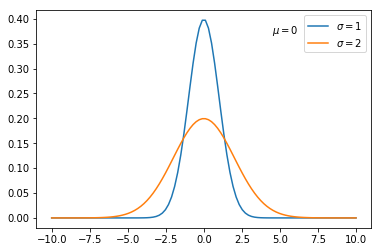

In [4]:
# Density

fig = plt.figure()
x = np.linspace(-10,10,100)     # Generates 100 evenly spaced numbers in the interval [-10,10]

for sigma in [1,2]:
    _=plt.plot(x,stats.norm.pdf(x,loc=0,scale=sigma),label=r"$\sigma=$"+str(sigma))
    _=plt.legend()
    
_=plt.text(4.5,0.37,r"$\mu=0$")


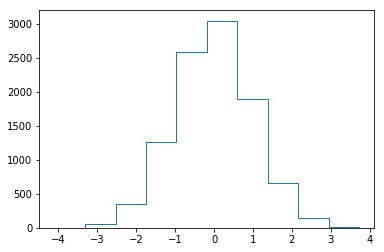

In [8]:
# Normal random numbers
fig = plt.figure()
x=stats.norm.rvs(size=10000)
_=plt.figure
_=plt.hist(x,histtype='step')


## Gamma distribution

$$
\begin{split}
f_X(x;\alpha,\beta) &= N_{\alpha,\beta}\; x^{\alpha-1}\; e^{-\beta x} \qquad\qquad x \in [0,\infty) \\
 N_{\alpha,\beta} &= \frac{\beta^\alpha}{\Gamma(\alpha)}
\end{split}
$$

Moment generating function:
$$
M_X(t) = E(e^{tX}) = N_{\alpha,\beta} \int_0^\infty x^{\alpha-1}\; e^{-(\beta-t) x} = \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{\Gamma (\alpha)}{(\beta-t)^\alpha} = \frac{1}{(1-\frac{t}{\beta})^\alpha}
$$

Expectation and variance:
$$
\begin{split}
\mu_X &= \frac{d M_X}{dt}\bigg\rvert_{t=0} = \frac{\alpha}{\beta}\\
\sigma_X^2 &= E(X^2) - \mu_X^2 = \frac{d^2M_X}{dt^2}\bigg\rvert_{t=0} - \mu_X^2 = \frac{\alpha(\alpha+1)}{\beta^2} - \left(\frac{\alpha}{\beta}\right)^2 = \frac{\alpha}{\beta^2}
\end{split}
$$

## Chi squared distribution

This is a special case of the Gamma distribution with $\alpha=k/2$ and $\beta=1/2$.

$$
\begin{split}
f_X(x ; k) &= N_k\; x^{\frac{k}{2}-1}\; e^{-\frac{x}{2}}\\
N_k &= \frac{1}{\Gamma \left(\frac{k}{2}\right)\; 2^{\frac{k}{2}}}
\end{split}
$$


For the Chi squared distribution,
$$
M_X(t) = (1-2t)^{-\frac{k}{2}}
$$

Expectation and variance:
$$
\mu_X = k \qquad\qquad\qquad \sigma_X^2 = 2k
$$


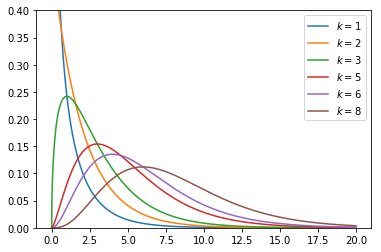

In [6]:
# Density

fig = plt.figure()
x = np.linspace(0,20,1000)

for k in [1,2,3,5,6,8]:
    _=plt.plot(x,stats.chi2.pdf(x,df=k),label=r"$k=$"+str(k))
    _=plt.legend()
_= plt.ylim(0,0.4)

## Student's t Distribution

$$
\begin{split}
f_X(x) & = N_k \left (1+\frac{x^2}{k} \right )^{-\frac{k+1}{2}} \\
N_k & = \frac{\Gamma\left (\frac{k+1}{2} \right )}{\sqrt{k \pi}\: \Gamma\left (\frac{k}{2} \right ) }
\end{split}
$$

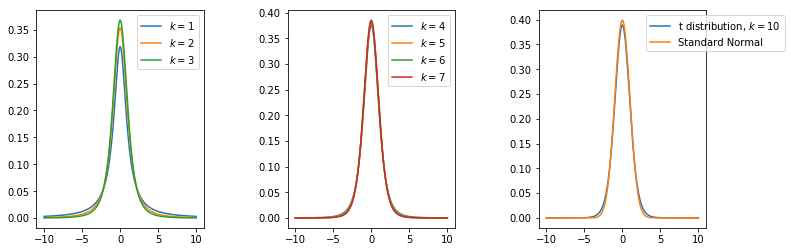

In [7]:
# Density function

fig = plt.figure(figsize=(12,4))     # Figure size is (width,height) in inches
fig.subplots_adjust(wspace=0.5,hspace=0.5)


x = np.linspace(-10,10,1000)

a1 = fig.add_subplot(1,3,1)
for k in list(range(1,4)):
    _ = plt.plot(x,stats.t.pdf(x,df=k),label=r"$k=$"+str(k))
    _ = plt.legend()
    
a2 = fig.add_subplot(1,3,2)
for k in list(range(4,8)):
    _ = plt.plot(x,stats.t.pdf(x,df=k),label=r"$k=$"+str(k))
    _ = plt.legend()

a3 = fig.add_subplot(1,3,3)
_ = plt.plot(x,stats.t.pdf(x,df=10),label=r"t distribution, $k=10$")
_ = plt.plot(x,stats.norm.pdf(x),label=r"Standard Normal")
_ = plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))
    



## Importance

1. **The square of a standard normal random variable is Chi-square distributed**.

With $X \sim N(0,1)$, let $Y = X^2$. Then,

$$
\begin{split}
F_Y(y) = P[Y \le y] = P[X^2 \le y] &= \int_{-\sqrt{y}}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx\\
 &=  2 \int_{0}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx\\
     & = \int_{0}^{y}\frac{1}{\sqrt{2\pi}} \frac{e^{-\frac{y'}{2}}}{\sqrt{y'}} dy'
\end{split}
$$

Differentiating the cumulative distribution function with respect to $y$, we get
$$
f_Y(y) = \frac{1}{\sqrt{2\pi}} \frac{e^{-\frac{y}{2}}}{\sqrt{y}} = \chi_1^2(y)
$$

2. **The sum of the squares of $n$ standard normal variables is distributed as $\chi^2_n$**

This is best proved by using moment generating functions.

Let $Y = X_1^2 + \dots + X_n^2$, where the set $\{X_i\}$ consists of $n$ independent, identically distributed (iid) standard normal variables. Then,
$$
\begin{split}
M_Y(t) = E(e^{tY}) &= E(e^{t(X_1^2+\dots+X_n^2)})\\
     & = \int e^{t(x_1^2+\dots+x_n^2)}\; f(x_1,\dots,x_n)\; dx_1 \dots dx_n \\
     & = \int e^{tx_1^2}f(x_1) dx_1 \dots \int e^{tx_n^2}f(x_n)dx_n \\
     & = M_{X_1^2}(t) \dots M_{X_n^2}(t) \\
     & = \prod_{i=1}^n (1-2t)^{-\frac{1}{2}}\\
     & = (1-2t)^{-\frac{n}{2}}
\end{split}
$$
The last line implies that $Y \sim \chi_n^2$.